<a href="https://colab.research.google.com/github/victoriamaccari/proyecto/blob/master/GrowthDJ_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

In [21]:
url= "https://raw.githubusercontent.com/victoriamaccari/proyecto/master/GrowthDJ.csv"

In [22]:
df= pd.read_csv(url)

In [23]:
df.head(10)

,Unnamed: 0,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,1,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,2,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,3,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,4,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,5,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0
5,6,no,no,no,755.0,663.0,1.2,1.7,5.1,0.4,14.0
6,7,no,yes,no,889.0,2190.0,5.7,2.1,12.8,3.4,19.0
7,8,no,no,no,838.0,789.0,1.5,1.7,10.5,1.4,7.0
8,9,no,no,no,908.0,462.0,-0.9,1.9,6.9,0.4,6.0
9,10,no,no,no,1009.0,2624.0,6.2,2.4,28.8,3.8,16.0


In [27]:
#elimino columna Unnamed:0
df.drop(df.columns[[0]], axis='columns', inplace=True)

In [28]:
#Comprobar si hay valores perdidos
pd.isnull(df).any()



oil           False
inter         False
oecd          False
gdp60          True
gdp85          True
gdpgrowth      True
popgrowth      True
invest        False
school         True
literacy60     True
dtype: bool

In [17]:
#Total de valores perdidos por columna
df.isnull().sum()

Unnamed: 0     0
oil            0
inter          0
oecd           0
gdp60          5
gdp85         13
gdpgrowth      4
popgrowth     14
invest         0
school         3
literacy60    18
dtype: int64

In [29]:
#Metodo fillna, asigna el valor previo o el ultimo valor valido
df.fillna(method='ffill', inplace=True)

In [30]:
#Compruebo que no queden valores perdidos
pd.isnull(df).any()

oil           False
inter         False
oecd          False
gdp60         False
gdp85         False
gdpgrowth     False
popgrowth     False
invest        False
school        False
literacy60    False
dtype: bool

In [31]:
#Comprobar si hay valores duplicados
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
116    False
117    False
118    False
119    False
120    False
Length: 121, dtype: bool

In [42]:
#Deteccion de outliers
import matplotlib.pyplot as plt


In [53]:
summary = df.describe()
print(summary)

              gdp60         gdp85  ...      school  literacy60
count    121.000000    121.000000  ...  121.000000  121.000000
mean    3587.983471   5857.661157  ...    5.537190   48.256198
std     7349.898268   5600.090048  ...    3.502693   35.646302
min      383.000000    412.000000  ...    0.400000    1.000000
25%      978.000000   1237.000000  ...    2.400000   15.000000
50%     1939.000000   3775.000000  ...    4.900000   39.000000
75%     3766.000000   9903.000000  ...    8.200000   84.000000
max    77881.000000  25635.000000  ...   12.100000  100.000000

[8 rows x 7 columns]


(array([ 1.,  5., 14., 16., 30., 21., 17., 10.,  4.,  3.]),
 array([-0.9 ,  0.11,  1.12,  2.13,  3.14,  4.15,  5.16,  6.17,  7.18,
         8.19,  9.2 ]),
 <a list of 10 Patch objects>)

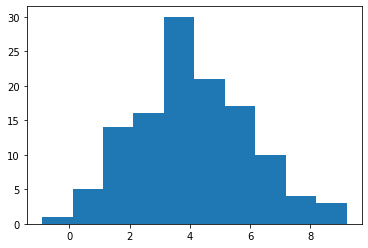

In [48]:
plt.hist(df["gdpgrowth"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f22d71d3198>],
 'caps': [<matplotlib.lines.Line2D at 0x7f22d71d3ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f22d71e3668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f22d71e32e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f22d71d34a8>,
  <matplotlib.lines.Line2D at 0x7f22d71d3828>]}

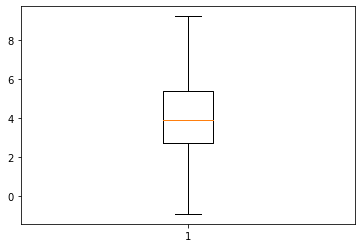

In [49]:
plt.boxplot(df['gdpgrowth'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f22d78fe400>],
 'caps': [<matplotlib.lines.Line2D at 0x7f22d790e080>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f22d7870f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f22d790e9b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f22d78fe5c0>,
  <matplotlib.lines.Line2D at 0x7f22d790e0f0>]}

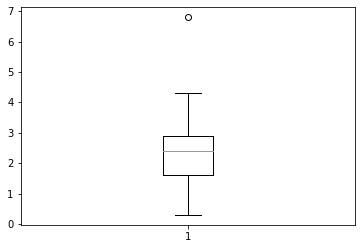

In [51]:
plt.boxplot(df['popgrowth'])

In [73]:
#IQR para cada columna
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

gdp60         2788.0
gdp85         8666.0
gdpgrowth        2.7
popgrowth        1.3
invest          12.1
school           5.8
literacy60      69.0
dtype: float64


In [76]:
BI=(df < (Q1 - 1.5 * IQR)) 
print(BI)

     gdp60  gdp85  gdpgrowth  inter  ...   oecd    oil  popgrowth  school
0    False  False      False  False  ...  False  False      False   False
1    False  False      False  False  ...  False  False      False   False
2    False  False      False  False  ...  False  False      False   False
3    False  False      False  False  ...  False  False      False   False
4    False  False      False  False  ...  False  False      False   False
..     ...    ...        ...    ...  ...    ...    ...        ...     ...
116  False  False      False  False  ...  False  False      False   False
117  False  False      False  False  ...  False  False      False   False
118  False  False      False  False  ...  False  False      False   False
119  False  False      False  False  ...  False  False      False   False
120  False  False      False  False  ...  False  False      False   False

[121 rows x 10 columns]


In [77]:
BS=(df > (Q3 + 1.5 * IQR))
print(BS)

     gdp60  gdp85  gdpgrowth  inter  ...   oecd    oil  popgrowth  school
0    False  False      False  False  ...  False  False      False   False
1    False  False      False  False  ...  False  False      False   False
2    False  False      False  False  ...  False  False      False   False
3    False  False      False  False  ...  False  False      False   False
4    False  False      False  False  ...  False  False      False   False
..     ...    ...        ...    ...  ...    ...    ...        ...     ...
116   True  False      False  False  ...  False  False      False   False
117  False  False      False  False  ...  False  False      False   False
118  False  False      False  False  ...  False  False      False   False
119   True  False      False  False  ...  False  False      False   False
120  False  False      False  False  ...  False  False      False   False

[121 rows x 10 columns]


In [82]:
df_out = df[~((df < (Q1 - 1.5 * IQR))).any(axis=1)]
df_out.shape

(121, 10)

In [84]:
df_out2 = df[~((df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out2.shape

(110, 10)

{'boxes': [<matplotlib.lines.Line2D at 0x7f22d5b8e780>],
 'caps': [<matplotlib.lines.Line2D at 0x7f22d5b9c1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f22d5b9cc50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f22d5b9c8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f22d5b8ea90>,
  <matplotlib.lines.Line2D at 0x7f22d5b8ee10>]}

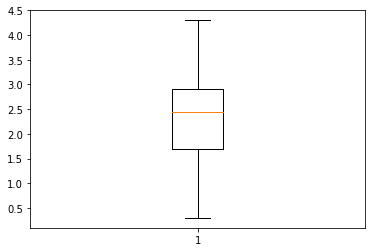

In [91]:
plt.boxplot(df_out2['popgrowth'])

In [87]:
import numpy as np

def outliers_iqr(df):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((df > upper_bound) | (df < lower_bound))

In [70]:
def boxplot_outlier_removal(df):
  for col in df.columns:
        if col not in exclude:
            # get Q1, Q3 & Interquantile Range
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            # define outliers and remove them
            filter_ = (df[col] > Q1 - 1.5 * IQR) & (df[col] < Q3 + 1.5 *IQR)
            df = df[filter_]
  after = len(df)
  diff = before-after
  percent = diff/before*100
  print('{} ({:.2f}%) outliers removed'.format(diff, percent))
  return df


In [92]:
summary = df_out2.describe()
print(summary)

             gdp60         gdp85  ...      school  literacy60
count   110.000000    110.000000  ...  110.000000  110.000000
mean   2364.263636   5023.263636  ...    5.179091   44.272727
std    1963.342356   4890.696790  ...    3.393007   34.556405
min     383.000000    412.000000  ...    0.400000    1.000000
25%     917.000000   1193.750000  ...    2.325000   13.250000
50%    1620.500000   3150.000000  ...    4.450000   32.000000
75%    3145.000000   6042.000000  ...    7.975000   74.500000
max    7938.000000  19723.000000  ...   12.100000  100.000000

[8 rows x 7 columns]
